In [1]:
## Data Loading
import pandas as pd

## Data Manipulation
import numpy as np

## Plotting
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
## Read Training and Test Data From json files in current directory
trainData = pd.read_json("train.json")
testData = pd.read_json("test.json")
print(trainData.shape, testData.shape)

(39774, 3) (9944, 2)


# 2. Exploratory Analysis

In [3]:
trainData.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


## 2.1 Country Distribution in Training Data

Text(0.5, 1.0, 'Recipe Count over Countries')

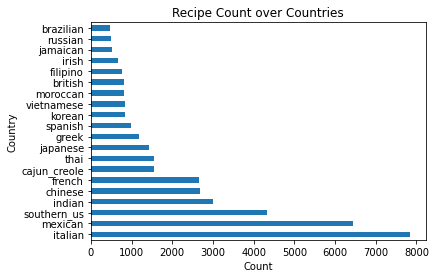

In [4]:
trainData.cuisine.value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Recipe Count over Countries")

## 2.2 Distinct Ingredient Count over Country

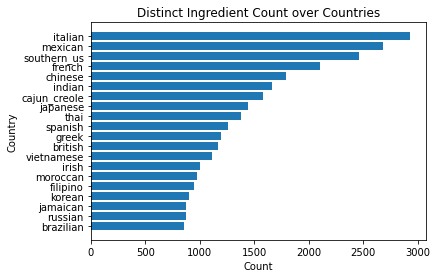

In [5]:
countries = np.unique(trainData.cuisine)
ingredientOverCountry = {}
for country in countries:
    countryData = trainData[trainData.cuisine == country]
    if country not in ingredientOverCountry:
        ingredientOverCountry[country] = set()
    for idx in range(countryData.shape[0]):
        ingredientOverCountry[country] = ingredientOverCountry[country].union(\
                                                set(list(countryData.ingredients.iloc[idx])))
counts = [len(ingredientOverCountry[country]) for country in countries]
pairs = [(countries[i], counts[i]) for i in range(len(countries))]
pairs = sorted(pairs, key = lambda i:i[1])
plt.barh([pairs[i][0] for i in range(len(countries))],[pairs[i][1] for i in range(len(countries))] )
plt.title('Distinct Ingredient Count over Countries')
plt.ylabel('Country')
plt.xlabel('Count')
plt.show()

In [6]:
ingredients = set()
for i in ingredientOverCountry:
    ingredients = ingredients.union(ingredientOverCountry[i])
print(len(ingredients))

6714


In [7]:
ingredients

{'cubed pancetta',
 'wieners',
 'peeled tomatoes',
 'shredded American cheese',
 'soya cheese',
 'hoagi or roll',
 'beans',
 'veal loin',
 'macaroni and cheese dinner',
 'picholine',
 'Louisiana Hot Sauce',
 'fat-free parmesan cheese',
 'Philadelphia Cream Cheese',
 'kielbasa (not low fat)',
 'Azteca Flour Tortillas',
 'marrons',
 'whole wheat bread slices',
 'almond milk',
 'strawberry yogurt',
 'peppermint',
 'toasted sunflower seeds',
 'whole wheat pasta shells',
 'baby zucchini',
 'whole wheat linguine',
 'cream cheese spread',
 'Soy Vay® Toasted Sesame Dressing & Marinade',
 'pastry',
 'buffalo',
 'Knorr® Fiesta Sides™ - Mexican Rice',
 'loin pork chops',
 'saffron threads',
 'chicken nugget',
 'sparkling wine',
 'Italian parsley leaves',
 'garlic bread',
 'shredded monterey jack cheese',
 'beef heart',
 'chocolate sandwich cookies',
 'whole wheat english muffins',
 'precooked meatballs',
 'shredded colby',
 'canned corn',
 'Velveeta Queso Blanco',
 'buckwheat',
 'Toulouse sausage